# Illinois Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [3]:
# SQLAlchemy
from sqlalchemy import create_engine

# Path to sqlite
database_path = "../states_HPI_disa_weather_final2.csv"

# Read database_path and store into Pandas data frame
final_data = pd.read_csv(database_path)

final_data

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,58.58,14.42
...,...,...,...,...,...,...,...,...,...,...,...
82,CA,1995,NaN,0.079,0.079,0.554,31493525,61846,329.986000,58.67,14.58
83,CA,1994,NaN,0.084,0.086,0.555,31317179,60464,332.747455,57.75,14.00
84,CA,1993,NaN,0.073,0.095,0.560,31147208,59529,338.246727,57.50,14.00
85,CA,1992,NaN,0.084,0.093,0.553,30875920,62517,350.106852,59.08,14.67


In [4]:
#drop nan's so I can create the plots

df = final_data.dropna()
df

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Average Temperature (F),Average Temperature (C)
0,CA,1996,11.0,0.078,0.073,0.550,31780829,63176,330.618545,59.42,15.00
1,CA,1997,20.0,0.076,0.064,0.557,32217708,63245,338.655091,58.92,14.58
2,CA,1998,15.0,0.069,0.059,0.560,32682794,64349,355.755536,56.67,13.50
3,CA,1999,85.0,0.074,0.052,0.557,33145121,67156,376.622500,57.75,14.25
4,CA,2000,32.0,0.081,0.049,0.571,33987977,69696,439.172182,58.58,14.42
5,CA,2001,81.0,0.070,0.054,0.582,34479458,68413,486.225714,58.75,14.58
6,CA,2002,124.0,0.065,0.067,0.577,34871843,67600,525.130526,58.58,14.50
7,CA,2003,130.0,0.058,0.068,0.589,35253159,68695,564.373621,59.33,14.83
8,CA,2004,63.0,0.058,0.062,0.597,35574576,66782,666.211724,58.58,14.58
9,CA,2005,35.0,0.059,0.054,0.597,35827943,67918,824.612931,58.25,14.50


In [5]:
#create a new IL dataset to easily reference 
IL_df = df["State"] == 'IL'

IL_filter = df[IL_df]

IL_filter

,State,Year,Total_Disaster,InterestRate,Unemployment Rate,HomeOwnRate,Population,MediumIncome,HPI,Average Temperature (F),Average Temperature (C)
44,IL,1991,36.0,0.093,0.073,0.630,11535973,31884,146.882787,53.75,12.00
45,IL,1992,23.0,0.084,0.079,0.624,11635197,31551,144.089571,52.08,11.08
46,IL,1993,12.0,0.073,0.074,0.618,11725984,32857,141.668171,50.92,10.50
47,IL,1994,17.0,0.084,0.058,0.642,11804986,35081,149.735000,52.08,11.08
48,IL,1995,58.0,0.079,0.052,0.664,11884935,38071,159.270122,51.67,10.92
49,IL,1996,71.0,0.078,0.053,0.682,11953003,39554,164.556386,50.25,10.17
50,IL,1997,35.0,0.076,0.048,0.681,12011509,41283,170.086627,51.33,10.50
51,IL,1998,105.0,0.069,0.044,0.680,12069774,43178,170.318864,55.33,12.75
52,IL,1999,76.0,0.074,0.044,0.671,12128370,46330,175.569318,53.75,11.92
53,IL,2000,58.0,0.081,0.043,0.679,12434161,46064,182.080114,52.33,11.33


# Average Temperature vs. HPI

The correlation between both factors is 0.01


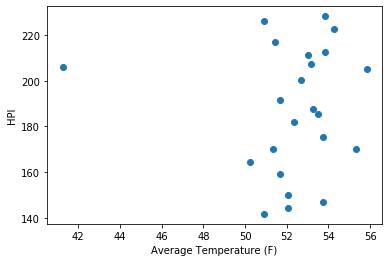

In [7]:
IL_temp = IL_filter.iloc[:,9]
IL_HPI = IL_filter.iloc[:,8]
correlation = st.pearsonr(IL_temp, IL_HPI)
plt.scatter(IL_temp, IL_HPI)
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 7.387944227839184e-05


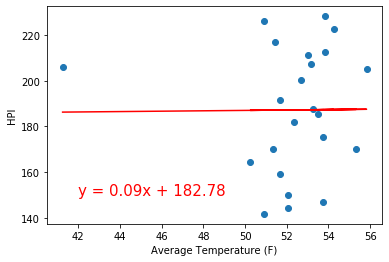

In [8]:
# Add the linear regression equation and line to plot

x_values = IL_temp
y_values = IL_HPI
correlation = st.pearsonr(IL_temp, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,150),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Average Temperature vs. Home Owner Rate

The correlation between both factors is 0.12


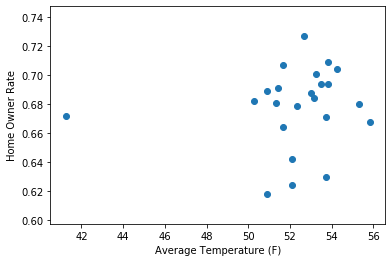

In [9]:
#correlation between Temperature vs Home Owner Rate

IL_HomeOwnerRate = IL_filter.iloc[:,5]
correlation = st.pearsonr(IL_temp, IL_HomeOwnerRate)
plt.scatter(IL_temp, IL_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.01486625787670494


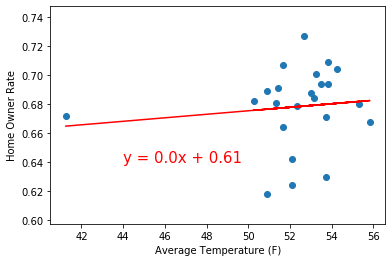

In [10]:
# Add the linear regression equation and line to plot

x_values = IL_temp
y_values = IL_HomeOwnerRate
correlation = st.pearsonr(IL_temp, IL_HomeOwnerRate)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(44,.64),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Home Owner Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Average Temperature vs. Interest Rate

The correlation between both factors is 0.18


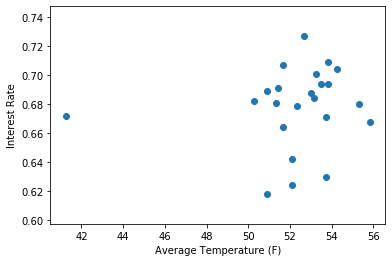

In [11]:
#correlation between Temperature vs Interest Rate
IL_Interest = IL_filter.iloc[:,3]
correlation = st.pearsonr(IL_temp, IL_Interest)
plt.scatter(IL_temp, IL_HomeOwnerRate)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.031158639029418803


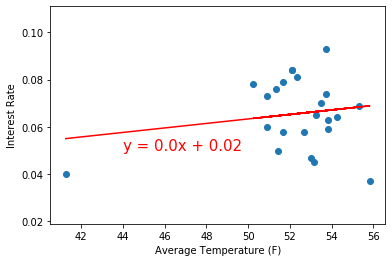

In [12]:
# Add the linear regression equation and line to plot

x_values = IL_temp
y_values = IL_Interest
correlation = st.pearsonr(IL_temp, IL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(44,.05),fontsize=15,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# HPI vs Interest Rate

The correlation between both factors is -0.77


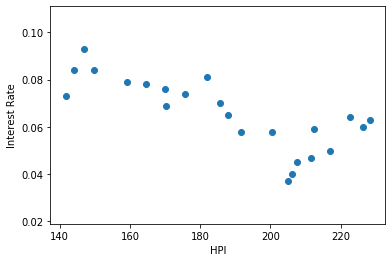

In [13]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(IL_HPI, IL_Interest)
plt.scatter(IL_HPI, IL_Interest)
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.589005672444225


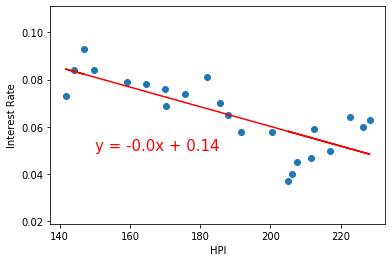

In [28]:
# Add the linear regression equation and line to plot
x_values = IL_HPI
y_values = IL_Interest
correlation = st.pearsonr(IL_HPI, IL_Interest)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,.05),fontsize=15,color="red")
plt.xlabel('HPI')
plt.ylabel('Interest Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Total Disaster vs. Interest Rate

The correlation between both factors is -0.25


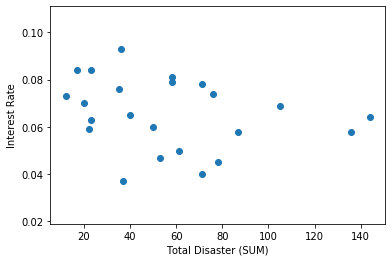

In [15]:
#correlation between Temperature vs Interest Rate
IL_total_disaster = IL_filter.iloc[:,2]
correlation = st.pearsonr(IL_total_disaster, IL_Interest)
plt.scatter(IL_total_disaster, IL_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('Interest Rate')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.08876204005288198


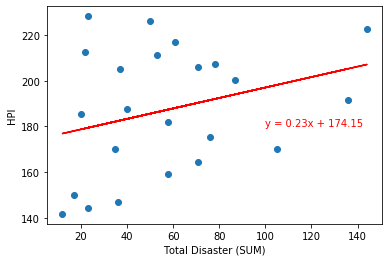

In [31]:
# Add the linear regression equation and line to plot
x_values = IL_total_disaster
y_values = IL_HPI
correlation = st.pearsonr(IL_total_disaster, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,180),fontsize=10,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Total Disaster vs. HPI

The correlation between both factors is 0.3


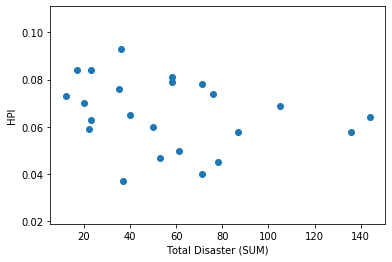

In [19]:
#correlation between Temperature vs Interest Rate
correlation = st.pearsonr(IL_total_disaster, IL_HPI)
plt.scatter(IL_total_disaster, IL_Interest)
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.08876204005288198


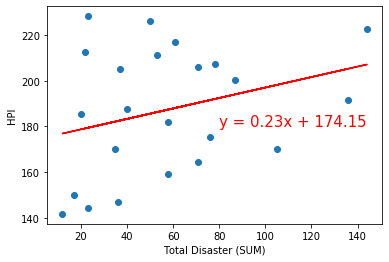

In [34]:
# Add the linear regression equation and line to plot
x_values = IL_total_disaster
y_values = IL_HPI
correlation = st.pearsonr(IL_total_disaster, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,180),fontsize=15,color="red")
plt.xlabel('Total Disaster (SUM)')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Uemployment Vs. HPI

The correlation between both factors is 0.22


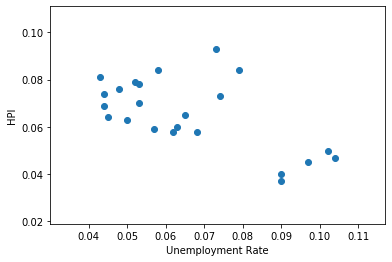

In [21]:
#correlation between Temperature vs Interest Rate
IL_unemployment = IL_filter.iloc[:,4]
correlation = st.pearsonr(IL_unemployment, IL_HPI)
plt.scatter(IL_unemployment, IL_Interest)
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.04668424865315822


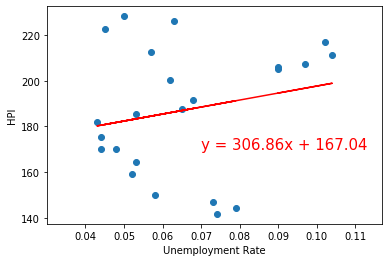

In [37]:
# Add the linear regression equation and line to plot
x_values = IL_unemployment
y_values = IL_HPI
correlation = st.pearsonr(IL_unemployment, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.07,170),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Medium Income vs. HPI 

The correlation between both factors is 0.94


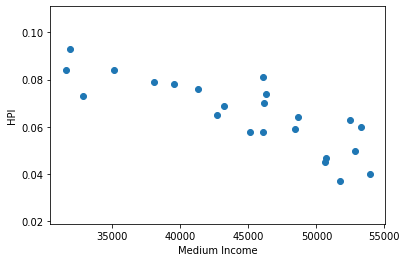

In [23]:
#correlation between Temperature vs Interest Rate
IL_medium_income = IL_filter.iloc[:,7]
correlation = st.pearsonr(IL_medium_income, IL_HPI)
plt.scatter(IL_medium_income, IL_Interest)
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.8852503230807891


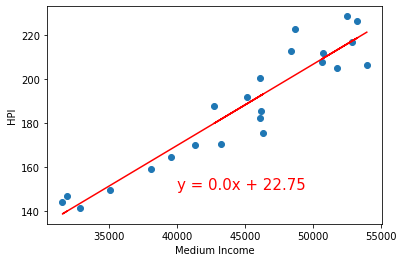

In [26]:
# Add the linear regression equation and line to plot
x_values = IL_medium_income
y_values = IL_HPI
correlation = st.pearsonr(IL_medium_income, IL_HPI)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000,150),fontsize=15,color="red")
plt.xlabel('Medium Income')
plt.ylabel('HPI')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Florida Analysis

# Average Temperature vs. Median Household Income, HPI, Home Owner Rate, Unemployment Rate, Population, Interest Rate Correlation

In [3]:
# Anna to add plot

# California Analysis

# Average Temperature vs. Median Household Income, HPI, Home Owner Rate, Unemployment Rate, Population, Interest Rate Correlation

In [ ]:
# Anna to add plot